# Dataset - import, clean and process

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


df = pd.read_csv('S.Y Maths MP 2023-24.csv')

m10 = df['10th']
m12 = df['12th']
mCET = df['CET']


# Handling categorical data - converting Pass/Fail to binary
label_encoder = LabelEncoder()
df['FYFH Result'] = label_encoder.fit_transform(df['FYFH Result'])
#Pass-1 and Fail-0

sem1 = df['FYFH Result']
df.drop('Timestamp',axis=1,inplace=True)
print(df)

     10th   12th        CET  FYFH Result
0   94.60  82.80  87.880000            1
1   89.80  77.60  96.900000            1
2   92.00  87.00  94.000000            1
3   87.00  82.00  75.000000            0
4   95.70  92.00  90.000000            1
5   94.00  88.00  95.457000            1
6   84.60  69.00  86.900000            0
7   92.60  91.20  97.800000            1
8   80.20  64.00  50.000000            0
9   92.00  85.00  97.400000            1
10  44.80  47.40  13.600000            0
11  91.00  70.00  72.000000            1
12  90.00  70.00  85.000000            1
13  92.00  68.00  89.000000            1
14  96.40  79.50  88.530000            1
15  94.80  78.50  95.700000            1
16  91.00  72.00  91.000000            0
17  89.00  77.00  90.130000            1
18  43.40  48.00  87.000000            1
19  91.80  68.79  84.140000            1
20  97.60  89.00  97.340000            1
21  91.00  70.00  85.000000            1
22  97.00  89.00  94.000000            1
23  91.60  83.50

In [2]:
df.describe()

,10th,12th,CET,FYFH Result
count,56.000000,56.000000,56.000000,56.000000
mean,88.609643,77.641607,87.647564,0.750000
std,10.074819,10.433326,13.333710,0.436931
min,43.400000,47.400000,13.600000,0.000000
25%,86.750000,70.000000,83.855000,0.750000
50%,91.000000,78.250000,90.065000,1.000000
75%,94.150000,85.000000,96.325000,1.000000
max,97.600000,95.170000,98.130000,1.000000


# Data Representation - Bar graph

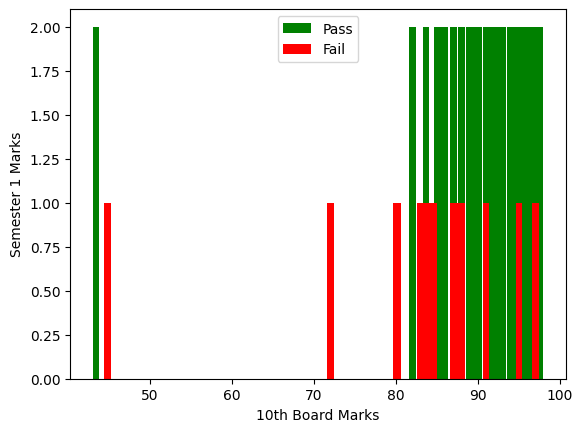

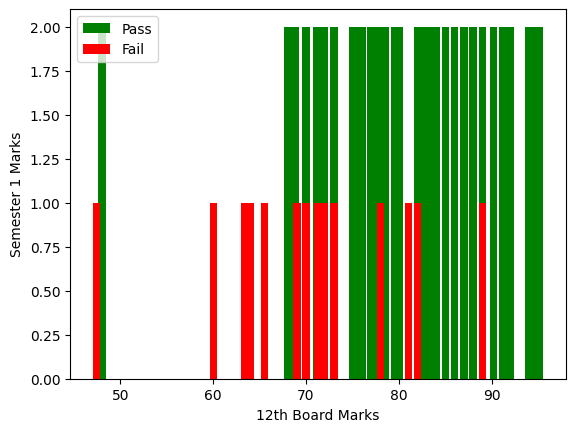

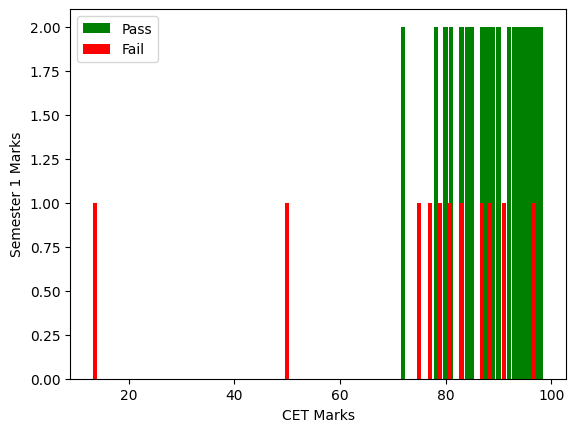

In [3]:
# bar
pass_indices = [i for i, result in enumerate(sem1) if result == 1]
fail_indices = [i for i, result in enumerate(sem1) if result == 0]

plt.bar([m10[i] for i in pass_indices], [sem1[i]+1 for i in pass_indices], label="Pass", color='g')
plt.bar([m10[i] for i in fail_indices], [sem1[i]+1 for i in fail_indices], label="Fail", color='r')
plt.xlabel('10th Board Marks')
plt.ylabel('Semester 1 Marks')
plt.legend()
plt.show()

plt.bar([m12[i] for i in pass_indices], [sem1[i]+1 for i in pass_indices], label="Pass", color='g')
plt.bar([m12[i] for i in fail_indices], [sem1[i]+1 for i in fail_indices], label="Fail", color='r')
plt.xlabel('12th Board Marks')
plt.ylabel('Semester 1 Marks')
plt.legend()
plt.show()

plt.bar([mCET[i] for i in pass_indices], [sem1[i]+1 for i in pass_indices], label="Pass", color='g')
plt.bar([mCET[i] for i in fail_indices], [sem1[i]+1 for i in fail_indices], label="Fail", color='r')
plt.xlabel('CET Marks')
plt.ylabel('Semester 1 Marks')
plt.legend()
plt.show()

# Data Scaling

In [4]:
X = df[['10th', '12th', 'CET']]
y = df['FYFH Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train",X_train_scaled)
print("X_test",X_test_scaled)
print("y_train",y_train)
print("y_test",y_test)

X_train [[ 0.3386447   1.57049518  0.56244684]
 [ 0.79358994  0.37451318  0.2527107 ]
 [-0.73502608 -1.26008638 -2.64053885]
 [ 0.06567755 -0.07954226  0.1238922 ]
 [-0.33467426 -0.80603095 -0.09861246]
 [ 0.67530418  1.28262404  0.11493691]
 [ 0.10207317 -0.200321   -0.70155476]
 [ 0.61161184  0.82856861 -0.36727135]
 [ 0.24765565  0.01126883  0.04605001]
 [ 0.61161184 -0.71521986  0.38359579]
 [-1.48113628 -1.62333072 -0.36933796]
 [ 0.59341403  0.05667437  0.5075922 ]
 [ 0.3386447   0.64694643  0.62469992]
 [ 0.24765565 -0.53359769  0.1838238 ]
 [-0.0253115  -0.26116443  0.56959041]
 [ 0.3386447  -0.17035334 -0.02283688]
 [ 0.52062279  0.55613535  0.61574463]
 [ 0.42963374 -0.53359769 -0.09172377]
 [ 0.3386447   0.73775752  0.6494992 ]
 [ 0.24765565 -0.71521986 -1.12502718]
 [ 0.64800746  1.11916408  0.67498736]
 [-0.38926769 -0.4427866  -0.64281892]
 [ 0.16394572 -0.4427866   0.46626007]
 [ 0.61161184  1.01019078  0.5764791 ]
 [ 0.62980965  1.46424621  0.41066145]
 [ 0.13846879 -0.

# Model Training - RandomForest

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334

Confusion Matrix:
[[3 1]
 [1 7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.88      0.88      0.88         8

    accuracy                           0.83        12
   macro avg       0.81      0.81      0.81        12
weighted avg       0.83      0.83      0.83        12



# Model Feedback

[0.36537245 0.29819062 0.33643693]


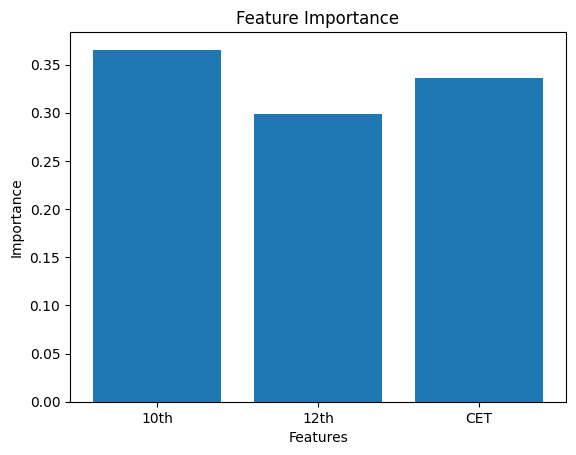

In [6]:
feature_importance = model.feature_importances_
print(feature_importance)

plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Finalization

In [7]:
# Example user input (you can modify this according to your interface)
user_10th_marks = float(input("Enter 10th-grade marks: "))
user_12th_marks = float(input("Enter 12th-grade marks: "))
user_CET_marks = float(input("Enter CET marks: "))


# Assuming 'scaler' is the StandardScaler used during training
user_input_scaled = scaler.transform([[user_10th_marks, user_12th_marks, user_CET_marks]])


user_prediction = model.predict(user_input_scaled)
user_prediction_label = label_encoder.inverse_transform(user_prediction)[0]
print("Predicted Result:", user_prediction_label)


print(f"With 10th marks {user_10th_marks}, 12th marks {user_12th_marks}, and CET marks {user_CET_marks},")
print(f"the predicted result for the first year of engineering is: {user_prediction_label}")

Predicted Result: Pass
With 10th marks 54.0, 12th marks 47.0, and CET marks 98.0,
the predicted result for the first year of engineering is: {user_prediction_label}


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
